In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date

In [111]:
df = pd.read_csv('US_Accidents_Dec19.csv')
df = df[df.State.isin(['CA'])]
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [85]:
print(df.groupby('Weather_Condition'))

In [112]:
#df['Weather_Condition'].value_counts().plot('bar')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663204 entries, 728 to 2974334
Data columns (total 49 columns):
ID                       663204 non-null object
Source                   663204 non-null object
TMC                      449296 non-null float64
Severity                 663204 non-null int64
Start_Time               663204 non-null object
End_Time                 663204 non-null object
Start_Lat                663204 non-null float64
Start_Lng                663204 non-null float64
End_Lat                  213908 non-null float64
End_Lng                  213908 non-null float64
Distance(mi)             663204 non-null float64
Description              663204 non-null object
Number                   139891 non-null float64
Street                   663204 non-null object
Side                     663204 non-null object
City                     663198 non-null object
County                   663204 non-null object
State                    663204 non-null object
Zipcode         

In [114]:
features = ['Severity','Start_Lat','Start_Lng','Distance(mi)','City','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']




In [115]:
#df[0]['Start_Time']-df[0]['End_Time']
print(df.iloc[0])

ID                                                                   A-729
Source                                                            MapQuest
TMC                                                                    201
Severity                                                                 3
Start_Time                                             2016-06-21 10:34:40
End_Time                                               2016-06-21 11:04:40
Start_Lat                                                          38.0853
Start_Lng                                                         -122.233
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                             0
Description              Right hand shoulder blocked due to accident on...
Number                                                                 NaN
Street                   

In [120]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')


td='Time_Taken' #mins
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663204 entries, 728 to 2974334
Data columns (total 55 columns):
ID                       663204 non-null object
Source                   663204 non-null object
TMC                      449296 non-null float64
Severity                 663204 non-null int64
Start_Time               663204 non-null datetime64[ns]
End_Time                 663204 non-null datetime64[ns]
Start_Lat                663204 non-null float64
Start_Lng                663204 non-null float64
End_Lat                  213908 non-null float64
End_Lng                  213908 non-null float64
Distance(mi)             663204 non-null float64
Description              663204 non-null object
Number                   139891 non-null float64
Street                   663204 non-null object
Side                     663204 non-null object
City                     663198 non-null object
County                   663204 non-null object
State                    663204 non-null object


In [117]:
#df.loc[:, ['Time_Taken', 'Year ', 'Hour']]
#df['Weekday']

In [121]:
features = ['Severity','Start_Lat','Start_Lng','Distance(mi)','County','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Taken']



In [122]:
df_ca_imp = df[features].copy() #making a new data set of features above

In [123]:
type(df_ca_imp)

pandas.core.frame.DataFrame

In [124]:
df_ca_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663204 entries, 728 to 2974334
Data columns (total 31 columns):
Severity             663204 non-null int64
Start_Lat            663204 non-null float64
Start_Lng            663204 non-null float64
Distance(mi)         663204 non-null float64
County               663204 non-null object
Weather_Timestamp    653807 non-null object
Temperature(F)       648079 non-null float64
Wind_Chill(F)        191385 non-null float64
Humidity(%)          646890 non-null float64
Pressure(in)         651962 non-null float64
Visibility(mi)       650008 non-null float64
Wind_Direction       651056 non-null object
Wind_Speed(mph)      534398 non-null float64
Precipitation(in)    195589 non-null float64
Weather_Condition    650323 non-null object
Amenity              663204 non-null bool
Bump                 663204 non-null bool
Crossing             663204 non-null bool
Give_Way             663204 non-null bool
Junction             663204 non-null bool
Railway

In [125]:
time='Time_Taken'
df_ca_imp[time][df[time]<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
628942     -0.0
628943    -30.0
1265261   -30.0
1265262   -31.0
2002111   -30.0
2002112   -31.0
2565705    -7.0
2565708    -7.0
Name: Time_Taken, dtype: float64

In [126]:
outliers=df_ca_imp[time]<=0
df[outliers] = np.nan
df.dropna(subset=[time],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663191 entries, 728 to 2974334
Data columns (total 55 columns):
ID                       663191 non-null object
Source                   663191 non-null object
TMC                      449285 non-null float64
Severity                 663191 non-null float64
Start_Time               663191 non-null datetime64[ns]
End_Time                 663191 non-null datetime64[ns]
Start_Lat                663191 non-null float64
Start_Lng                663191 non-null float64
End_Lat                  213906 non-null float64
End_Lng                  213906 non-null float64
Distance(mi)             663191 non-null float64
Description              663191 non-null object
Number                   139887 non-null float64
Street                   663191 non-null object
Side                     663191 non-null object
City                     663185 non-null object
County                   663191 non-null object
State                    663191 non-null objec

In [127]:
df_ca_imp.dropna(subset=df_ca_imp.columns[df_ca_imp.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_ca_imp.shape

(163085, 31)

In [128]:
df_ca_imp.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),County,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Hour,Weekday,Time_Taken
6040,2,38.510437,-121.464523,0.01,Sacramento,2016-12-07 15:53:00,45.0,42.6,80.0,30.16,...,False,False,False,False,False,False,Day,16,Wed,29.0
6044,2,38.676666,-121.638069,0.01,Yolo,2016-12-07 16:53:00,44.1,42.5,82.0,30.16,...,False,False,False,False,False,False,Night,16,Wed,30.0
6051,2,38.538242,-121.473648,0.01,Sacramento,2016-12-07 17:53:00,44.1,40.8,85.0,30.17,...,False,False,False,False,False,False,Night,17,Wed,45.0
6052,2,38.496086,-121.419502,0.01,Sacramento,2016-12-07 17:53:00,44.1,40.8,85.0,30.17,...,False,False,False,False,False,False,Night,18,Wed,45.0
6063,2,37.752377,-121.773773,0.00,Alameda,2016-12-07 19:53:00,44.1,39.5,76.0,30.12,...,False,False,False,False,False,False,Night,19,Wed,30.0


In [129]:
df_ca_imp['Weekday']

6040       Wed
6044       Wed
6051       Wed
6052       Wed
6063       Wed
          ... 
2974330    Fri
2974331    Fri
2974332    Fri
2974333    Fri
2974334    Fri
Name: Weekday, Length: 163085, dtype: object

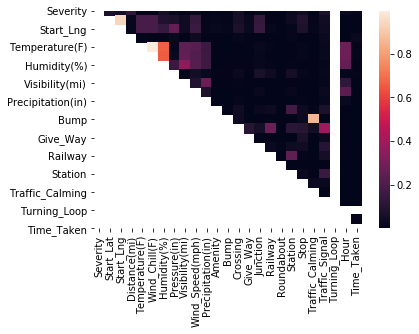

In [130]:
#removing the correlated features
def removeHighlyCorrelated(data):
  corr_matrix = data.corr().abs()
  matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  sns.heatmap(matrix)
  plt.show
  to_drop = [column for column in matrix.columns if any(matrix[column] >= 0.8)]
  return to_drop

to_drop = removeHighlyCorrelated(df_ca_imp)

In [101]:
to_drop

['Wind_Chill(F)']

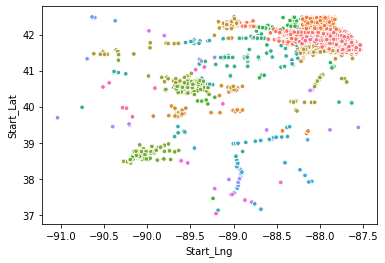

In [102]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_ca_imp, hue='County', legend=False, s=20)
plt.show()

In [103]:
df_ca_imp = df_ca_imp.drop(df_ca_imp[['Wind_Chill(F)','Weather_Timestamp']], axis=1)

In [104]:
df_ca_imp

,Severity,Start_Lat,Start_Lng,Distance(mi),County,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Hour,Weekday,Time_Taken
167298,2,41.816620,-88.168243,0.010,Dupage,36.0,82.0,29.62,10.0,WSW,...,False,False,False,False,True,False,Day,14,Wed,135.0
167302,2,41.810738,-87.947052,0.010,DuPage,37.0,79.0,29.68,9.0,WSW,...,False,False,False,False,False,False,Night,17,Wed,45.0
167306,2,41.774406,-87.935806,0.010,DuPage,37.9,70.0,29.69,10.0,WSW,...,False,False,False,False,False,False,Night,17,Wed,45.0
167310,2,41.736378,-87.624580,0.010,Cook,37.9,70.0,29.69,10.0,WSW,...,False,True,False,False,False,False,Night,17,Wed,44.0
167320,3,41.799076,-87.802094,0.010,Cook,37.0,76.0,29.73,9.0,WSW,...,False,False,False,False,False,False,Night,2,Thu,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974043,3,41.636507,-87.578370,0.301,Cook,71.0,53.0,29.54,10.0,NE,...,False,False,False,False,False,False,Day,17,Fri,29.0
2974044,3,41.862250,-87.918500,0.250,Cook,68.0,52.0,29.48,10.0,NNE,...,False,False,False,False,False,False,Day,18,Fri,29.0
2974045,3,42.348120,-87.889280,0.228,Lake,66.0,59.0,29.42,10.0,NNE,...,False,False,False,False,False,False,Day,19,Fri,29.0
2974046,3,41.667240,-87.662880,0.568,Cook,65.0,65.0,29.54,10.0,NNE,...,False,False,False,False,False,False,Night,21,Fri,29.0


In [105]:
df_final = pd.get_dummies(df_ca_imp)

# Export data
#df_final.to_csv('US_Accidents_Dec19_processed.csv',index=False)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20798 entries, 167298 to 2974047
Columns: 187 entries, Severity to Weekday_Wed
dtypes: bool(12), float64(10), int64(2), uint8(163)
memory usage: 5.5 MB


In [106]:
#df_final = pd.get_dummies(df_ca_imp,drop_first=True)


In [107]:
df_final.shape

(20798, 187)

In [108]:
df_final.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
count,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,...,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000
mean,2.405472,41.857720,-88.037689,0.267641,47.420728,74.638667,29.492704,7.724288,9.839095,0.007746,...,0.000048,0.698673,0.301327,0.173334,0.195980,0.046110,0.035917,0.167853,0.190980,0.189826
std,0.563924,0.572189,0.463288,1.234290,20.570417,16.493200,0.401683,3.333467,5.337166,0.036446,...,0.006934,0.458845,0.458845,0.378545,0.396963,0.209729,0.186087,0.373744,0.393083,0.392173
min,1.000000,37.035700,-91.039238,0.000000,-20.900000,11.000000,28.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,41.809270,-88.111547,0.000000,31.000000,64.000000,29.210000,5.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,41.907555,-87.946533,0.000000,44.100000,78.000000,29.390000,10.000000,9.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,42.071868,-87.771451,0.084000,66.000000,88.000000,29.740000,10.000000,13.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,42.494910,-87.526572,35.160000,95.000000,100.000000,30.650000,25.000000,39.100000,1.760000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
df_final.to_csv('US_Accidents_Dec19_IL-final.csv')

In [ ]:
df_final.iloc[0]